In [1]:
import os
import numpy as np
import pandas as pan
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pan.read_csv("ex1data1.txt", header=None, names=["Population","Profits"])

In [3]:
data.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profits
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


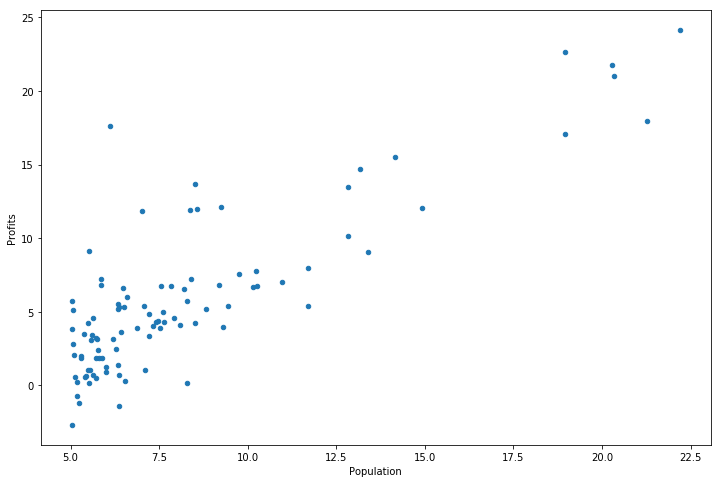

In [5]:
data.plot(kind='scatter', x = 'Population', y = 'Profits', figsize=(12,8))

In [6]:
def computecost(x,y, theta):
    inner = np.power(((x * theta.T) -  y), 2)
    return np.sum(inner) / (2* len(x))

In [7]:
data.insert(0, 'Ones',1)

In [8]:
cols = data.shape[1]
x = data.iloc[:, 0 :cols-1]
y = data.iloc[:, cols-1: cols]

In [9]:
x = np.matrix(x.values)
y = np.matrix(y.values)

In [10]:
theta = np.matrix(np.array([0,0]))

In [11]:
theta.shape

(1, 2)

In [12]:
theta

matrix([[0, 0]])

In [13]:
computecost(x,y, theta)

32.072733877455676

In [14]:
def gradientdescent(x,y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0, j] - ((alpha / len(x)) * np.sum(term))
        theta = temp
        cost[i] = computecost(x, y , theta)
    return theta, cost

In [15]:
alpha = 0.01
iters = 1000

In [16]:
g, cost = gradientdescent(x, y, theta, alpha, iters)

In [17]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [18]:
computecost(x,y,g)

4.5159555030789118

Text(0.5,1,u'Predicted Profit vs. Population Size')

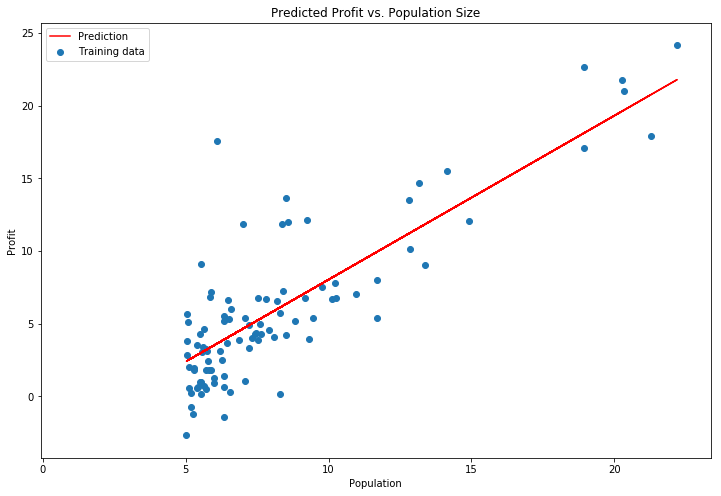

In [19]:
X =np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1] * x)
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x, f, 'r', label = 'Prediction')
ax.scatter(data.Population, data.Profits, label='Training data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5,1,u'Error vs. Training Epoch')

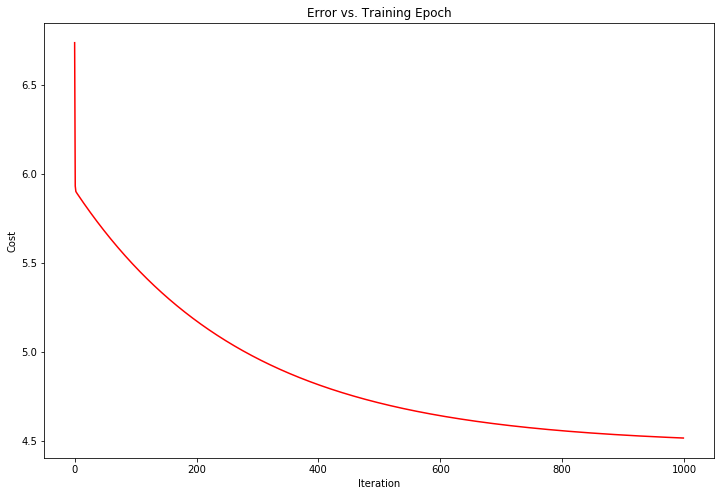

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title("Error vs. Training Epoch")

In [21]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5,1,u'Predicted Profit vs. Population Size')

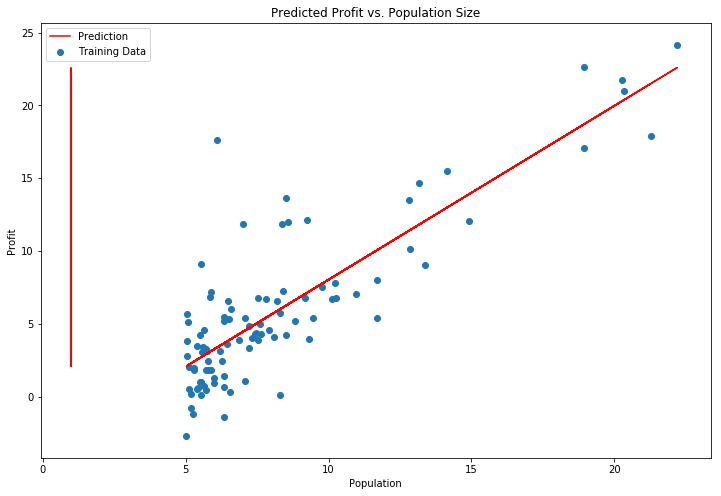

In [22]:
X = np.array(x[:, 1].A1)
f = model.predict(x).flatten()
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profits, label="Training Data")
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
